---
* **Universidad:** UOC (Universitat Oberta de Catalunya)
* **Titulación:** Master Ciencia de Datos/TFM
* **Título:** Segmentación de imágenes utilizando Redes Generativas Antagónicas
* **Actividad**: Segmentación partes cuerpo personas con armas cortas utilizando modelos pre entrenados
* **Autor:** Miguel Ponce
* **Correo:** miguelalejoponce@uoc.edu
* **Fecha:** "Enero, 04 de 2023"
* **Salida**: ipynb
---
## Contexto: Modelo detección de personas armadas

* **Contexto:**
Se desea crear un modelo que permita segmentar ha personas con armas cortas.

* **Problema:** 
El objetivo de la proyecto es permitir que mediante las técnicas de mejoras en la segmentación de objetos en imágenes se puedan proponer nuevos sistemas de vigilancia y alerta temprana contra sospechosos de intento de asesinato y porte ilegal de armas. Es necesrio crear un modelo de segmentación de personas con armadas con armas cortas, basados en un conjunto de datos pre-entrenado mediante el uso de redes GAN y arquitecturtas pensadas para la segmentación de objetos.

* **Solucion :** 
Se construye una red antagónica generativa condicional (cGAN) basada en el trabajo de pix2pix una red que realiza un proceso de mapaeo de imágenes de entrada hacia imágenes de salida. Este proceoso se conoce como la traducción de imagen a imagen con GANs, [trabajo](https://arxiv.org/abs/1611.07004) realizado por Isola et al. en el 2017. Se puede utilizar está aruqitecutra de red multi-proposito ya que se puede aplicar en varias tareas, Por ejmeplo:  síntesis de fotos a partir de mapas, generación de fotos con color a partir de imágenes en blanco y negro, conversión de fotos de Google Maps en imágenes aéreas e incluso la transformación de bocetos en fotos.

* **Entorno:** con GPU.
  
---
## Origen del la fuente de datos


@misc{ dataset-gun-segmented_dataset,
    title = { dataset-gun-segmented Dataset },
    type = { Open Source Dataset },
    author = { Miguel Alejandro Ponce Proaño },
    howpublished = { \url{ https://universe.roboflow.com/miguel-alejandro-ponce-proano/dataset-gun-segmented } },
    url = { https://universe.roboflow.com/miguel-alejandro-ponce-proano/dataset-gun-segmented },
    journal = { Roboflow Universe },
    publisher = { Roboflow },
    year = { 2023 },
    month = { jan },
    note = { visited on 2023-01-12 },
}

--- 
## Referencias:
Este notebook se basa en el desarrollo de trabajos realizados previamente por:
* [Zakaria Mejdoul](https://github.com/zakariamejdoul/ground-truth-gan-segmentation/blob/main/ground-truth-gan-segmentation.ipynb)
* [TensorFLow](https://www.tensorflow.org/tutorials/generative/pix2pix)

* [Jason Brownlee](https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/)




## Licencia
MIT License

Copyright (c) 2018 Continual AI

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


## Entorno de trabajo

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Características de la red pix2pix: Red GAN Segmentación de personas con armas

A continuación se desarrollará una res que generará imágenes en donde se realizó la segmentación de las partes del cuerpo de una persona armada. Utiliza una base de datos que contiene a las personas y las armas segmentadas(color rojo), trabajo desarrollado por Miguel Ponce, estudiante de la Universidad de UOC, en el [Máster de Ciencia de Datos](https://estudios.uoc.edu/es/masters-universitarios/data-science/presentacion). 

La arquitectura de esta red está formada por:
* **Genrador**: una arquitectura basada en [U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/).
* **Discriminador**: representado por un clasificador PatchGAN convolucional propuesto en el artículo de pix2pix. Se debe tomar en cuenta que cada época puede demorar alrededor varias horas dependiendo de la cantidad de GPU aprovisionada.

Sen realizara el entrenamiento de la red cGAN durante 40000 épocas en el conjunto de datos.


## Descargar Modelo

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pf0nqOYb3wX-7590ns4akDWGZv-q_jUZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pf0nqOYb3wX-7590ns4akDWGZv-q_jUZ" -O ./model-gan-segmentantion-person-armed-32.tar.gz && rm -rf /tmp/cookies.txt

--2023-01-20 20:44:10--  https://docs.google.com/uc?export=download&confirm=t&id=1pf0nqOYb3wX-7590ns4akDWGZv-q_jUZ
Resolving docs.google.com (docs.google.com)... 108.177.12.139, 108.177.12.113, 108.177.12.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/de634iqr15003voodjn4eenj4qceisnm/1674247425000/07156903365772177219/*/1pf0nqOYb3wX-7590ns4akDWGZv-q_jUZ?e=download&uuid=22aa64d2-af44-4d85-95df-17d736c262f0 [following]
--2023-01-20 20:44:10--  https://doc-0s-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/de634iqr15003voodjn4eenj4qceisnm/1674247425000/07156903365772177219/*/1pf0nqOYb3wX-7590ns4akDWGZv-q_jUZ?e=download&uuid=22aa64d2-af44-4d85-95df-17d736c262f0
Resolving doc-0s-bk-docs.googleusercontent.com (doc-0s-bk-docs.googleusercontent.com)... 172.217.203.132,

In [ ]:
#https://drive.google.com/file/d/1JF8LEG9FoLOYhoZCy0kfDZ8MTXsAokSP/view?usp=drivesdk

#
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JF8LEG9FoLOYhoZCy0kfDZ8MTXsAokSP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JF8LEG9FoLOYhoZCy0kfDZ8MTXsAokSP" -O ./model-gan-segmentantion-person-armed-32.tar.gz && rm -rf /tmp/cookies.txt
#1jxJHzecCg7Bc7T0A5NeKIXJQFJmxrb-U

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jxJHzecCg7Bc7T0A5NeKIXJQFJmxrb-U' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jxJHzecCg7Bc7T0A5NeKIXJQFJmxrb-U" -O ./model-gan-segmentantion-person-armed-12.tar.gz && rm -rf /tmp/cookies.txt

--2023-01-20 20:44:12--  https://docs.google.com/uc?export=download&confirm=t&id=1jxJHzecCg7Bc7T0A5NeKIXJQFJmxrb-U
Resolving docs.google.com (docs.google.com)... 108.177.12.139, 108.177.12.113, 108.177.12.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uf8j12pq7gh89lu1k3vf8fnf5duvmdpj/1674247425000/07156903365772177219/*/1jxJHzecCg7Bc7T0A5NeKIXJQFJmxrb-U?e=download&uuid=1a0cbfd4-cd85-45d2-9a4a-644618ce0505 [following]
--2023-01-20 20:44:12--  https://doc-00-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uf8j12pq7gh89lu1k3vf8fnf5duvmdpj/1674247425000/07156903365772177219/*/1jxJHzecCg7Bc7T0A5NeKIXJQFJmxrb-U?e=download&uuid=1a0cbfd4-cd85-45d2-9a4a-644618ce0505
Resolving doc-00-bk-docs.googleusercontent.com (doc-00-bk-docs.googleusercontent.com)... 172.217.203.132,

In [ ]:
!rm -rf ./model-gan-segmentantion-person-armed
!tar -xf model-gan-segmentantion-person-armed-32.tar.gz
!tar -xf model-gan-segmentantion-person-armed-12.tar.gz

In [ ]:
!rm -rf ./training_checkpoints
!mkdir training_checkpoints
!cp -r /content/model-gan-segmentantion-person-armed/ckpt-32.data-00000-of-00001 ./training_checkpoints
!cp -r /content/model-gan-segmentantion-person-armed/ckpt-32.index ./training_checkpoints
!cp -r /content/model-gan-segmentantion-person-armed/ckpt-14.data-00000-of-00001 ./training_checkpoints
!cp -r /content/model-gan-segmentantion-person-armed/ckpt-14.index ./training_checkpoints
!cp -r /content/model-gan-segmentantion-person-armed/checkpoint ./training_checkpoints

In [ ]:
!mv ./training_checkpoints/ckpt-14.data-00000-of-00001 ./training_checkpoints/resp.ckpt-14.data-00000-of-00001
!mv ./training_checkpoints/ckpt-14.index ./training_checkpoints/resp.ckpt-14.index
!mv ./training_checkpoints/ckpt-32.data-00000-of-00001 ./training_checkpoints/ckpt-14.data-00000-of-00001
!mv ./training_checkpoints/ckpt-32.index ./training_checkpoints/ckpt-14.index

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1et-3jdCN2CbN9u7xx4MEeC7LVn9cZylO' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1et-3jdCN2CbN9u7xx4MEeC7LVn9cZylO" -O ./video.mp4 && rm -rf /tmp/cookies.txt

--2023-01-20 20:44:42--  https://docs.google.com/uc?export=download&confirm=&id=1et-3jdCN2CbN9u7xx4MEeC7LVn9cZylO
Resolving docs.google.com (docs.google.com)... 108.177.12.102, 108.177.12.138, 108.177.12.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9af53la9p5m150ke0nienv78bt5u1os2/1674247425000/07156903365772177219/*/1et-3jdCN2CbN9u7xx4MEeC7LVn9cZylO?e=download&uuid=208eae0b-7744-403c-b8c3-e3ae5312b865 [following]
--2023-01-20 20:44:42--  https://doc-00-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9af53la9p5m150ke0nienv78bt5u1os2/1674247425000/07156903365772177219/*/1et-3jdCN2CbN9u7xx4MEeC7LVn9cZylO?e=download&uuid=208eae0b-7744-403c-b8c3-e3ae5312b865
Resolving doc-00-bk-docs.googleusercontent.com (doc-00-bk-docs.googleusercontent.com)... 172.217.203.132, 

## Descargamos el conjunto de datos

El conjunto de datos es una base de 800 imágenes, en donde se identificaran varias personas que están armas y otro grupo de personas sin armas. Esta base de datos sintetiza los procesos de extracción y detección de objetos para la detección de armas. La creación de los conjuntos de datos fue mediante el uso de la herramienta Roboflow; herramienta que permite simplificar el proceso de generación y creación de conjuntos de datos.

In [ ]:
!rm -rf data

In [ ]:

# Importing all necessary libraries
import cv2
import os
  
# Read the video from specified path
pathVideo = "/content/video.mp4"
cam = cv2.VideoCapture(pathVideo)
  

In [ ]:
listImagesOrder = []

In [ ]:

try:
      
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
  
while(True):  
    # reading from frame
    ret,frame = cam.read()
    frame = cv2.rotate(frame, cv2.ROTATE_180)
  
    if ret:
        # if video is still left continue creating images
        nameFile = str(currentframe) + '.jpg'
        name = './data/frame' + nameFile
        print ('Crear imagen:' + name)
  
        # writing the extracted images
        if currentframe%1==0:
          listImagesOrder.append(nameFile)
          cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Crear imagen:./data/frame0.jpg
Crear imagen:./data/frame1.jpg
Crear imagen:./data/frame2.jpg
Crear imagen:./data/frame3.jpg
Crear imagen:./data/frame4.jpg
Crear imagen:./data/frame5.jpg
Crear imagen:./data/frame6.jpg
Crear imagen:./data/frame7.jpg
Crear imagen:./data/frame8.jpg
Crear imagen:./data/frame9.jpg
Crear imagen:./data/frame10.jpg
Crear imagen:./data/frame11.jpg
Crear imagen:./data/frame12.jpg
Crear imagen:./data/frame13.jpg
Crear imagen:./data/frame14.jpg
Crear imagen:./data/frame15.jpg
Crear imagen:./data/frame16.jpg
Crear imagen:./data/frame17.jpg
Crear imagen:./data/frame18.jpg
Crear imagen:./data/frame19.jpg
Crear imagen:./data/frame20.jpg
Crear imagen:./data/frame21.jpg
Crear imagen:./data/frame22.jpg
Crear imagen:./data/frame23.jpg
Crear imagen:./data/frame24.jpg
Crear imagen:./data/frame25.jpg
Crear imagen:./data/frame26.jpg
Crear imagen:./data/frame27.jpg
Crear imagen:./data/frame28.jpg
Crear imagen:./data/frame29.jpg
Crear imagen:./data/frame30.jpg
Crear imagen:./dat

## Numero de imagenes

In [ ]:
len(listImagesOrder)

643

## Detectar persona

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

%cd ..

Cloning into 'yolov5'...
remote: Enumerating objects: 14995, done.
remote: Total 14995 (delta 0), reused 0 (delta 0), pack-reused 14995
Receiving objects: 100% (14995/14995), 14.07 MiB | 35.76 MiB/s, done.
Resolving deltas: 100% (10286/10286), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00
/content


## Detecar persona

In [ ]:
!rm -rf ./detect-person
!python .//yolov5/detect.py --weights yolov5s.pt --img 240 --conf 0.80 --project detect-person  --classes 0 --save-crop  --source /content/data

detect: weights=['yolov5s.pt'], source=/content/data, data=yolov5/data/coco128.yaml, imgsz=[240, 240], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=detect-person, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CPU

100% 14.1M/14.1M [00:00<00:00, 131MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [240, 240] must be multiple of max stride 32, updating to [256, 256]
image 1/643 /content/data/frame0.jpg: 256x160 1 person, 75.5ms
image 2/643 /content/data/frame1.jpg: 256x160 1 person, 33.2ms
image 3/643 /content/data/frame10.jpg: 256x160 1 person, 32.6ms
image 4/643 /content/data/frame100.jpg: 256x160 1 person, 31.6ms
image 5/643 /co

## Librerías

In [ ]:
import tensorflow as tf
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display
import glob
from pathlib import Path
from PIL import Image
import random
import matplotlib.image as mpimg
import numpy as np
import cv2

## Constantes

In [ ]:
PATH = "/content/data"
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256
SEMILLA_ALEATORIA = 1234
np.random.seed(SEMILLA_ALEATORIA)

## Clases

Es necesario separar las imágenes de la persona real de las imágenes segmentadas, cuyo tamaño de 256x256 píxeles.

Se crea una función para la  carga de estas imagenes y que generan dos tensores uno por cada imagen:

In [ ]:
def load(image_file):
  # Carga el tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)
  reshaped_image = tf.image.resize(image, (IMG_HEIGHT, IMG_HEIGHT))

  
  # oRIGINAL
  input_image = reshaped_image
  real_image = reshaped_image
  #real_image = image[:, w:, :]
  #input_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

Se muestra de las imágenes de entrada a la derecha real y a la izquierda la mima imagen pero segmentada.

Se aplica rotaciones y reflejos aleatorios para preprocesar el conjunto de entrenamiento.

Defina varias funciones que:

1. Se cambiar el tamaño de cada imagen `256 x 256` a una mayor altura y anchura: `266 x 266`.
2. Se recorta aleatoriamente a `256 x 256`.
3. Se voltea aleatoriamente la imagen horizontalmente, es decir, de izquierda a derecha (espejo aleatorio).
4. Se Normaliza las imágenes al rango `[-1, 1]`.

In [ ]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [ ]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [ ]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [ ]:
# Normalizing the images to [-1, 1]
def de_normalize(input_image): 
  return (input_image + 1) *127.5

Se crean las funciones auxiliares para cargar y preprocesar los conjuntos de entrenamiento y prueba:

## Separación de los datos de entrenamiento y test

## Generador


El generador de la red pix2pix cGAN es un U-Net modificado. Una U-Net consta de un codificador (disminución de muestreo) y un decodificador (disminución de muestreo).  En donde cada bloque del codificador esta formado por: Convolution -> Batch normalization -> Leaky ReLU. Cada bloque en el decodificador es: Transposed convolution -> Batch normalization -> Dropout (applied to the first 3 blocks) -> ReLU.

Existen conexiones de salto entre el codificador y el decodificador.


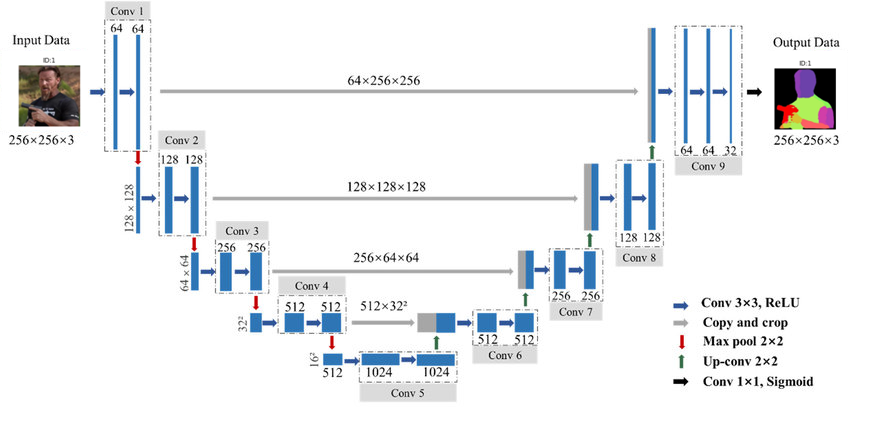

Definir el codificador(downsampler):

In [ ]:
OUTPUT_CHANNELS = 3

In [ ]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result


Defina el decodificador(upsampler):

In [ ]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

Creamos la función generador con el downsampler y el upsampler:

In [ ]:
def Generator():  
  inputs = tf.keras.layers.Input(shape=[IMG_WIDTH, IMG_HEIGHT, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])  

  # Upsampling and establishing the skip connections
  k = 1
  for up, skip in zip(up_stack, skips):    
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])  
  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

## Pérdida del generador
Las cGAN aprenden de una pérdida que penaliza una posible estructura que difiere de la salida de la red y la imagen de destino, como se describe en el artículo [Image-to-Image Translation with Conditional Adversarial Networks](https://arxiv.org/pdf/1611.07004.pdf).

- **gan_loss**, es la pérdida del generador es una pérdida de entropía cruzada sigmoidea de las imágenes generadas y una matriz de unos.
- **L1**, es una pérdida que mide el MAE (error absoluto medio) entre la imagen generada y la imagen de destino. Esto permite que la imagen generada se vuelva estructuralmente similar a la imagen de destino.

La fórmula para calcular la **pérdida total del generador** es la suma de la perdida de la red GAN(gan_loss) + LAMBDA * l1_loss, donde LAMBDA = 100.

In [ ]:
LAMBDA = 100

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

## Discriminador

PatchGAN es un tipo de discriminador para redes antagónicas generativas que solo penaliza la estructura a escala de parches de imagen locales. El discriminador PatchGAN intenta clasificar si cada parche en una imagen es real o falso. Este discriminador se ejecuta de forma convolucional a través de la imagen, promediando todas las respuestas para proporcionar el resultado final. Dicho discriminador modela efectivamente la imagen como un campo aleatorio de Markov, suponiendo independencia entre píxeles separados por más de un diámetro de parche. Puede entenderse como un tipo de pérdida de textura/estilo.

El discriminador es un clasificador PatchGAN convolucional que intenta clasificar si cada imagen _parche_ es real o no, como se describe en el artículo de pix2pix.

- Cada bloque en el discriminador es: Convolution -> Batch normalization -> Leaky ReLU.
- La forma de la salida después de la última capa es `(batch_size, 30, 30, 1)`.
- Cada parche de imagen `30 x 30` de la salida clasifica una porción `70 x 70` de la imagen de entrada.
- El discriminador recibe 2 entradas:
    - La imagen de entrada y la imagen de destino, que debe clasificar como *real*.
    - La imagen de entrada y la imagen generada (la salida del generador), que debe clasificar como *false*.
    - Utiliza `tf.concatenate([inp, tar], axis=-1)` para concatenar estas 2 entradas juntas.

In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[IMG_WIDTH, IMG_HEIGHT, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[IMG_WIDTH, IMG_HEIGHT, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

## Pérdida del discriminador
La función discriminator_loss tiene 2 entradas: las imágenes reales y las imágenes generadas.
- **real_loss** es una pérdida de entropía cruzada sigmoidea de las imágenes reales y una matriz de unos (ya que estas son las imágenes reales).
- **generated_loss** es una pérdida de entropía cruzada sigmoidea de las imágenes generadas y una matriz de ceros (ya que estas son las imágenes falsas).

La pérdida total es la suma de la pérdida real y la pérdida generada.

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

## Definir los optimizadores y un punto de control(checkpoint)


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
generator = Generator()
discriminator = Discriminator()

In [ ]:

checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Generar imágenes durante entrenamiento

Perimte graficas las imágenes durante el entrenamiento.

- Pasar imágenes de prueba al generador.
- El generador luego traducirá la imagen de entrada a la salida.
- El último paso realizar las predicciones.

## Entrenamiento


El proceso es el siguiente:
- Para cada imagen  de entrada genera una imagen de salida.
- El discriminador recibe la `imagen_de_entrada` y la imagen generada como primera entrada. La segunda entrada es `input_image` y `target_image`.
- Calcular el generador y la pérdida del discriminador.
- Calcular las pérdidas con respecto tanto al generador y al discriminador(entradas) y se deben aplicar al optimizador.

## Visualización entrenamiento
* 1k pasos: borre la pantalla y ejecuta generate_images para mostrar el progreso.
* 5k pasos: guarda un punto de control.

## Predicciones 
Para esto se toma el último punto de control.

In [ ]:
checkpoint_dir = "/content/training_checkpoints"

In [ ]:
!ls {checkpoint_dir}

checkpoint		     resp.ckpt-14.data-00000-of-00001
ckpt-14.data-00000-of-00001  resp.ckpt-14.index
ckpt-14.index


In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'/content/training_checkpoints/ckpt-14'

In [ ]:
discriminator.trainable = False
generator.training=False
ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=32,checkpoint_name="ckpt")
print(ckpt_manager.latest_checkpoint)
if ckpt_manager.latest_checkpoint:
  checkpoint.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

/content/training_checkpoints/ckpt-14
Latest checkpoint restored!!


## Ejemplo funciones Pile Line

In [ ]:
def generate_images_predict(model, test_input):
  prediction = model(test_input, training=True)
  return [test_input[0], prediction[0]]

def plot_images_predict(display_list):  
  plt.figure(figsize=(15, 15))
  title = ['Input Image', 'Predicted Image']
  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

def load_predict(image_file):
  # Read and decode an image file to a uint8 tensor
  image = cv2.imread(image_file)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))

  #image_resized = tf.reshape(image, [-1, IMG_WIDTH, IMG_HEIGHT, 3, 1])
  #image_resized = tf.squeeze(image_resized)
  #resize_image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
  
  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  # oRIGINAL
  input_image = image
  real_image = image
  #real_image = image[:, w:, :]
  #input_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image




def load_image_predict(image_file):
  input_image, real_image = load_predict(image_file)
  #input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

## Estrcutra proyecto videos

In [ ]:
!rm -rf files-video-original
!rm -rf files-video-segmented
!rm -rf files-video-alpha

In [ ]:
!mkdir files-video-original
!mkdir files-video-segmented
!mkdir files-video-alpha

In [ ]:
pathOriginal ="./files-video-original"
pathSegmentado ="./files-video-segmented"

In [ ]:
def convertTensorToImage(imageTensor):
   return cv2.cvtColor(np.array(imageTensor), cv2.COLOR_BGR2RGB)

In [ ]:
images = glob.glob("/content/detect-person/exp/crops/person/*.jpg")
pathImages = images
for path in pathImages:  
  inptest, re = load_image_predict(path)  
  display_list = generate_images_predict(checkpoint.generator, re[tf.newaxis, ...])
  #plot_images_predict(display_list) 
  file_name = os.path.basename(path)
  imgOri = convertTensorToImage(de_normalize(display_list[0]))
  imgSeg = convertTensorToImage(de_normalize(display_list[1]))
  
  #imgSeg =  np.array(display_list[1]) * 0.5 + 0.5 
  cv2.imwrite(os.path.join(pathOriginal , file_name), imgOri)
  cv2.imwrite(os.path.join(pathSegmentado , file_name), imgSeg) 

## Cracion proyecto Video

In [ ]:
!rm -rf videos
!mkdir videos

## Conversion imagen Original y Segmentado

In [ ]:
def conversionVideo(pathImages,pathVideo):  
  video = cv2.VideoWriter(pathVideo, 0, 32, (IMG_HEIGHT,IMG_WIDTH))
  for image in listImagesOrder:
    pathImage = os.path.join(pathImages, f'frame{image}')
    if os.path.exists(pathImage):            
      video.write(cv2.imread(pathImage))
  cv2.destroyAllWindows()
  video.release()

In [ ]:
conversionVideo(pathOriginal,'./videos/videoOriginal.avi')

In [ ]:
conversionVideo(pathSegmentado,'./videos/videoSegmentado.avi')

In [ ]:
def mergeAplhaFiles(pathOriginal, pathSegmented,pathResult):    
  for image in listImagesOrder:
    pathImageOriginal = os.path.join(pathOriginal , f'frame{image}')
    pathImageSegmented = os.path.join(pathSegmented , f'frame{image}')
    img1 = cv2.imread(pathImageOriginal)
    img2 = cv2.imread(pathImageSegmented)
    dst = cv2.addWeighted(img1, 0.8, img2, 0.6, 0)
    print(os.path.join(pathResult , f'frame{image}'))
    cv2.imwrite(os.path.join(pathResult , f'frame{image}'), dst)

In [ ]:
pathAlpha ="./files-video-alpha/"

In [ ]:
mergeAplhaFiles(pathOriginal,pathSegmentado,pathAlpha)

./files-video-alpha/frame0.jpg
./files-video-alpha/frame1.jpg
./files-video-alpha/frame2.jpg
./files-video-alpha/frame3.jpg
./files-video-alpha/frame4.jpg
./files-video-alpha/frame5.jpg
./files-video-alpha/frame6.jpg
./files-video-alpha/frame7.jpg
./files-video-alpha/frame8.jpg
./files-video-alpha/frame9.jpg
./files-video-alpha/frame10.jpg
./files-video-alpha/frame11.jpg
./files-video-alpha/frame12.jpg
./files-video-alpha/frame13.jpg
./files-video-alpha/frame14.jpg
./files-video-alpha/frame15.jpg
./files-video-alpha/frame16.jpg
./files-video-alpha/frame17.jpg
./files-video-alpha/frame18.jpg
./files-video-alpha/frame19.jpg
./files-video-alpha/frame20.jpg
./files-video-alpha/frame21.jpg
./files-video-alpha/frame22.jpg
./files-video-alpha/frame23.jpg
./files-video-alpha/frame24.jpg
./files-video-alpha/frame25.jpg
./files-video-alpha/frame26.jpg
./files-video-alpha/frame27.jpg
./files-video-alpha/frame28.jpg
./files-video-alpha/frame29.jpg
./files-video-alpha/frame30.jpg
./files-video-alph

In [ ]:
conversionVideo(pathAlpha,'./videos/videoAlpha.avi')